<img src="figuras/logo.png" alt="logo" style="max-width: 450px;display: block">

<h1 style="text-align: center; font-size: 3rem;">Processamento e interpretação de
dados de campos potenciais  </h1>

<h1 style="text-align: center; font-size: 2.0rem;">Distúrbio de gravidade (Gravity disturbance) </h1>

## ℹ️ Sobre este tutorial

***Este código ilustra como calcular o distúrbio de gravidade produzida por prismas retangulares homogêneneos. Presumimos que o distúrbio de gravidade pode ser aproximada pela componente vertical da atração gravitacional produzida pelos prismas.***

O *vetor gravidade* $\mathbf{g}$ é definido como o gradiente do *potencial de gravidade*, que é a soma entre o *potencial gravitacional* e o *potencial centrífugo*. Analogamente, o *vetor gravidade normal* $\mathbf{\gamma}$ é definido como o gradiente do *esferopotencial* (ou *potencial de gravidade normal*), que é a soma entre o potencial gravitacional e o potencial centrífugo produzidos pelo modelo de *Terra Normal*. O potencial centrífugo da Terra e do modelo de Terra Normal são iguais. A amplitude do vetor gravidade é denominada *gravidade* e a amplitude do vetor gravidade normal é denominada *gravidade normal*.

Se considerarmos uma pequena região na superfície do planeta, a gravidade $\mathbf{g}$ e a gravidade normal $\mathbf{\gamma}$ são vetores praticamente paralelos. Matematicamente, a gravidade $\mathbf{g}$ em um determinado ponto pode ser escrita como

$$\mathbf{g} = \mathbf{\gamma} + \mathbf{\Delta g} \: ,$$ 

em que o vetor 

$$\mathbf{\Delta g} = \left[ \begin{array}{c}  \Delta g_{x} \\ \Delta g_{y} \\ \Delta g_{z} \end{array} \right]$$

é uma pequena perturbação no vetor gravidade normal $\mathbf{\gamma}$, tal que $\| \mathbf{\gamma} \| \gg \| \mathbf{\Delta g} \|$. O vetor $\mathbf{\Delta g}$ representa a atração gravitacional exercida pelas *massas anômalas*.

Geralmente, as medidas da gravidade na superfície da Terra são referidas a um sistema local de coordenadas Cartesianas, em que o eixo $z$ fica na direção vertical e aponta para o interior da Terra. Dessa forma, a gravidade normal $\mathbf{\gamma}$ fica aproximadamente alinhada com o eixo $z$ e pode ser escrita da seguinte forma:

$$\mathbf{\gamma} \approx  \left[ \begin{array}{c}  0 \\ 0 \\ g_{0} \end{array} \right] \: .$$

Seja $f(h_{x}, h_{y}, h_{z}) = f(\mathbf{h})$ uma função escalar que calcula a norma Euclidiana de um vetor $\mathbf{h}$ com coordenadas Cartesianas $h_{x}$, $h_{y}$ e $h_{z}$. Esta função pode ser escrita como

$$
\begin{split}
f(h_{x}, h_{y}, h_{z}) &= \| \mathbf{h} \| \\
&= \sqrt{\mathbf{h}^{\intercal}\mathbf{h}} \: .
\end{split}
$$

A expansão da função $f(\mathbf{h})$ em série de Taylor (até primeira ordem) em torno de um ponto $\mathbf{h}_{0}$ pode ser escrita da seguinte forma

$$
f (\mathbf{h}_{0} + \Delta \mathbf{h}) \approx f(\mathbf{h}_{0}) + \nabla f(\mathbf{h}_{0})^{\top} \Delta \mathbf{h} \: ,
$$

em que o gradiente $\nabla f(\mathbf{h}_{0})$ é dado por

$$
\begin{split}
\nabla \, f(\mathbf{h}) &= \left[ \begin{array}{c}  \frac{\partial \, f(\mathbf{h})}{\partial \, h_{x}} \\ 
\frac{\partial \, f(\mathbf{h})}{\partial \, h_{y}} \\ \frac{\partial \, f(\mathbf{h})}{\partial \, h_{z}} \end{array} \right] \\ 
&= \hat{\mathbf{h}}
\end{split}
$$

e

$$\hat{\mathbf{h}} = \dfrac{\mathbf{h}}{\| \mathbf{h} \|}$$

é um vetor unitário na direção de $\mathbf{h}$.

Se considerarmos que o $\| \mathbf{\gamma} \| \gg \| \mathbf{\Delta g} \|$, podemos expandir a norma do vetor gravidade $\mathbf{g}$ em séria de Taylor da seguinte forma:

$$
\begin{split}
f(\mathbf{g}) &= f(\mathbf{\gamma} + \Delta \mathbf{g}) \\
&\approx f(\mathbf{\gamma}) + \nabla f(\mathbf{\gamma})^{\intercal} \mathbf{\Delta  g} \\
&\approx f(\mathbf{\gamma}) + \Delta g_{z} \: ,
\end{split}
$$

em que $\nabla \, f(\mathbf{\gamma}) = \hat{\mathbf{\gamma}}$ e $\Delta g_{z}$ é a componente vertical (na direção $z$) do vetor $\mathbf{\Delta g}$. Sendo assim, a diferença entre a *gravidade* e a *gravidade normal* no mesmo ponto é, aproximadamente, a componente vertical da atração gravitacional exercida pelas massas anômalas. Esta diferença é comumente representada por $\delta g$ e é denominada *distúrbio de gravidade*.

Lembrando que $f(\mathbf{\gamma}) = \|\mathbf{\gamma}\|$ e $f(\mathbf{g}) = \|\mathbf{g}\|$, o distúrbio de gravidade pode ser escrito como:

$$
\begin{split}
\delta g &= \|\mathbf{g}\| - \|\mathbf{\gamma}\| \\
&\approx \Delta g_{z} \: .
\end{split}
$$

## 🐍 Importe as bibliotecas necessárias

In [1]:
import pyvista as pv # pacote de plotagem 3D
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from codes import functions as func
from codes import plot_functions as plf
from codes import plot_function_pyvista as plv
from codes import prism

In [3]:
from matplotlib import rcParams
rcParams["figure.dpi"] = 150

### Grid de pontos onde é calculado o dado sintético

In [4]:
# numero de pontos ao longo de x e y 
shape = (50, 50)

# Oeste, Leste, Sul, Norte
area = [-5000, 5000, -5000, 6000]

# Coordenadas no sistema topocentrico 
y = np.linspace(area[0], area[1], shape[0])
x = np.linspace(area[2], area[3], shape[1])
y, x = np.meshgrid(y, x)
y = np.ravel(y)
x = np.ravel(x)
z = np.zeros_like(y) -150

coordinates = np.vstack([y, x, z])

In [5]:
coordinates.shape

(3, 2500)

### Cria modelo formado por prismas

In [6]:
# prismas = [Oeste, Leste, Sul, Norte, Topo, Base]
prismas = np.array([[2000., 3000., -1500., -500.,10.,200.],
                    [1600., 2600., -2500., -1500.,10.,200.], 
                    [-5000., 5000., 1500., 2500.,10.,200.],
                    [-3000., -2000., -4000., 1500.,10.,200.]])

### Densidade de cada prisma (g/cm³)

In [7]:
densidade = np.array([100,120,300,370]) 

### Plot 3D do modelo formado por prismas retangulares 

* ***Habilite as linhas abaixo para fazer a plotagem 3D***

### Dados sintéticos - Componentes atração gravitacional

In [8]:
# Calcula a componente x da atração gravitacional
gx = prism.grav(coordinates=coordinates, 
                         prisms=prismas, 
                         density=densidade, 
                         field='g_x')

In [9]:
# Calcula a componente y da atração gravitacional
gy = prism.grav(coordinates=coordinates, 
                         prisms=prismas, 
                         density=densidade, 
                         field='g_y')

In [10]:
# Calcula a componente z da atração gravitacional ≃ distúrbio de gravidade 
gz = prism.grav(coordinates=coordinates, 
                         prisms=prismas, 
                         density=densidade, 
                         field='g_z')

### Plot das componentes da atração gravitacional 

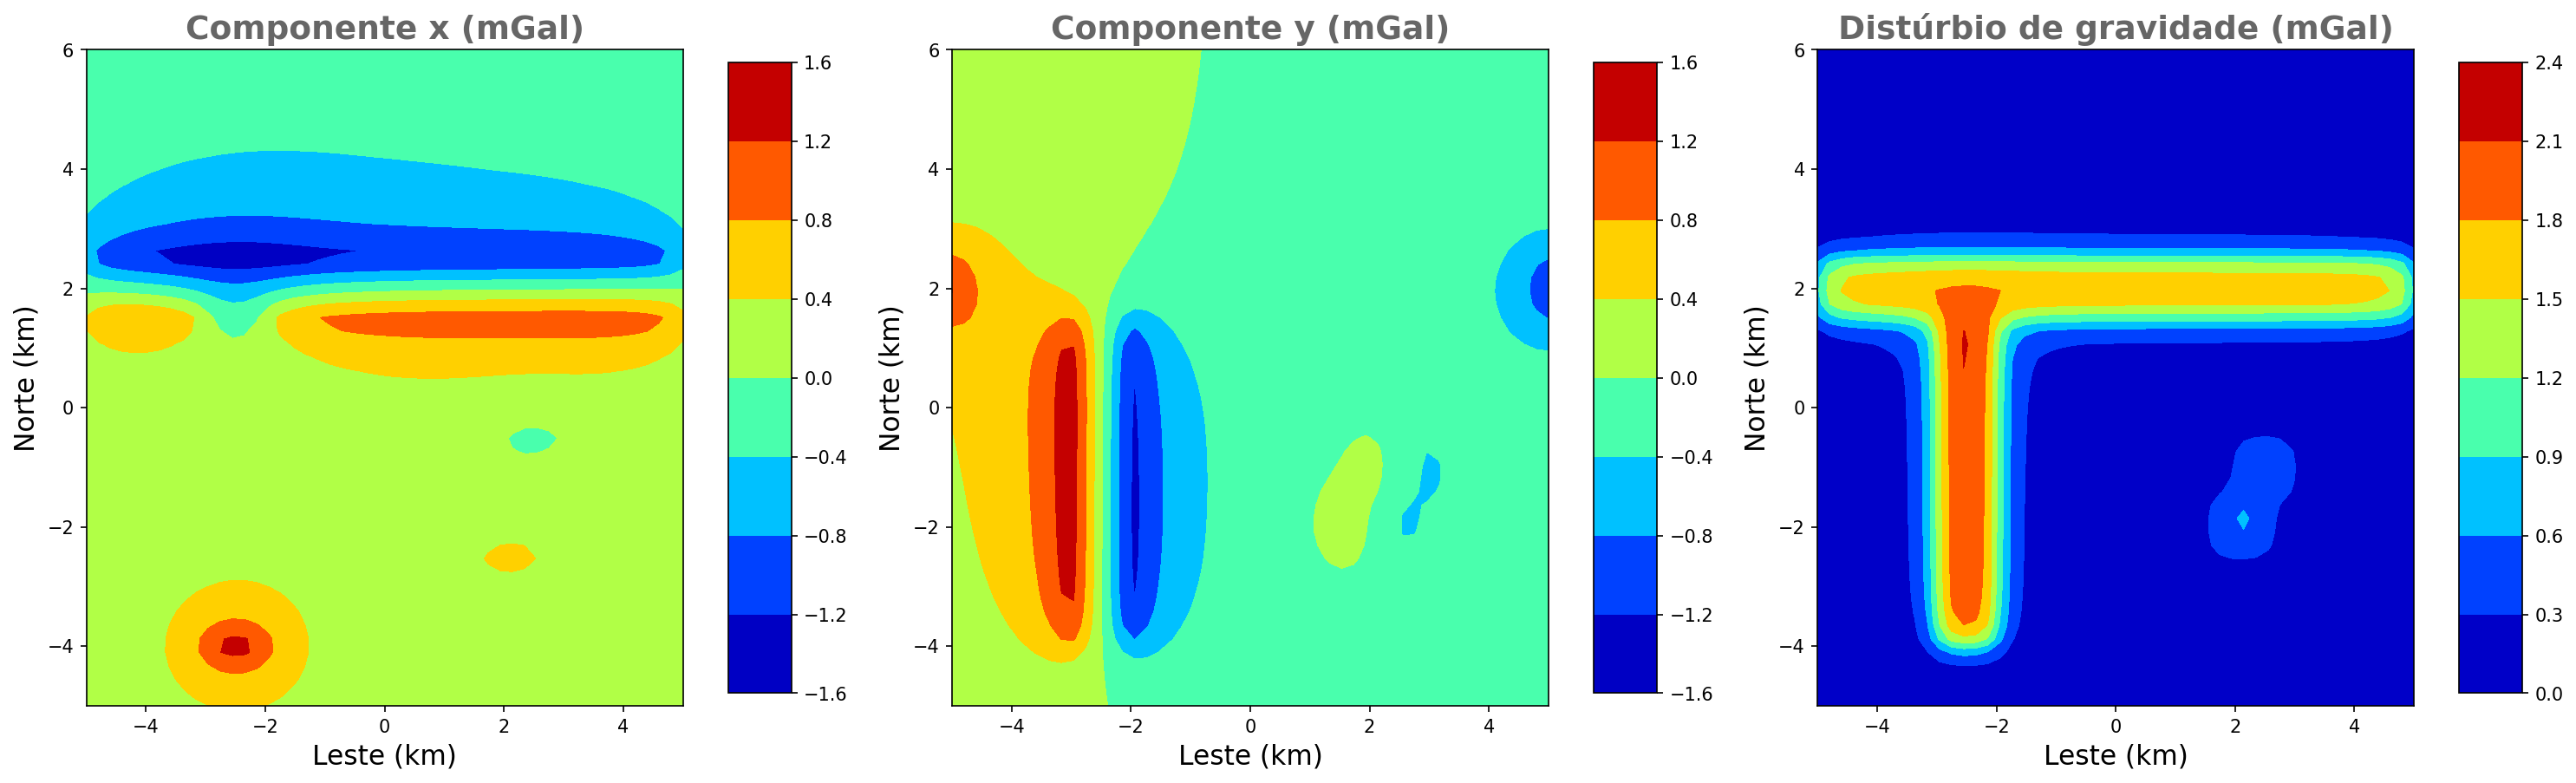

In [11]:
fields = [gx, gy, gz]
windows = [1, 2, 3]
titles = ['Componente x (mGal)',
          'Componente y (mGal)',
          'Distúrbio de gravidade (mGal)']

plt.figure(figsize=(20,10))

for w, window in enumerate(windows):

    plt.subplot(1,3,window)
    plt.title(titles[w], fontsize=18,weight='bold', alpha=.6)
    plt.axis('scaled')
    plt.contourf(y.reshape(shape)*0.001, 
                 x.reshape(shape)*0.001, 
                 fields[w].reshape(shape), cmap='jet')
    
    plt.colorbar(shrink=0.5, pad=0.06, aspect=10)
#     plf.model_boundaries_2(prismas, m2km=True,linewidth = 2)
    plt.xlim(0.001*area[0], 0.001*area[1])
    plt.ylim(0.001*area[2], 0.001*area[3])
    plt.xlabel('Leste (km)', fontsize=15)
    plt.ylabel('Norte (km)', fontsize=15)

plt.tight_layout()
plt.savefig('figuras/notebook-2/componentes_gravitacional.png',dpi = 500, bbox_inches = 'tight')
plt.show()